In [1]:
import pandas as pd
import pygad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Parameters of the best solution : [3. 0. 2. 2. 2. 0. 1. 2. 0. 2. 0. 1. 0. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2.
 2. 1. 1. 2.]
Fitness value of the best solution = -0.29
Number of steps:  29


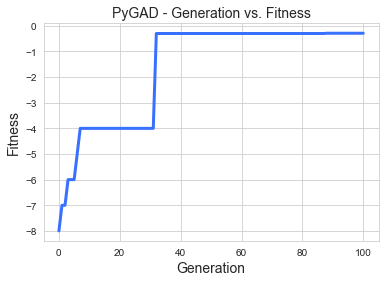

Parameters of the best solution : [3. 2. 2. 3. 2. 0. 2. 1. 2. 2. 0. 1. 0. 2. 2. 0. 1. 1. 1. 1. 1. 2. 1. 2.
 1. 2. 1. 1.]
Fitness value of the best solution = -0.29
Number of steps:  29


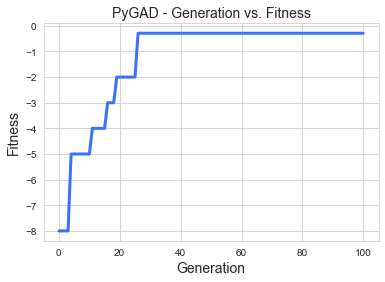

Parameters of the best solution : [2. 2. 1. 2. 2. 0. 0. 2. 1. 2. 1. 0. 0. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2.
 1. 1.]
Fitness value of the best solution = -0.27
Number of steps:  27


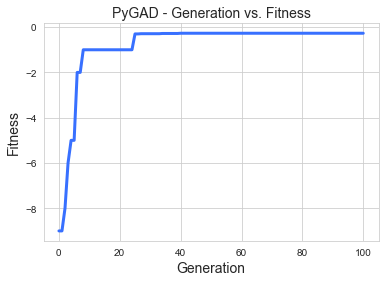

Parameters of the best solution : [2. 1. 2. 2. 1. 2. 2. 0. 2. 2. 1. 1. 1. 1. 1. 2. 0. 1. 2. 1. 2. 1. 1.]
Fitness value of the best solution = -0.24
Number of steps:  24


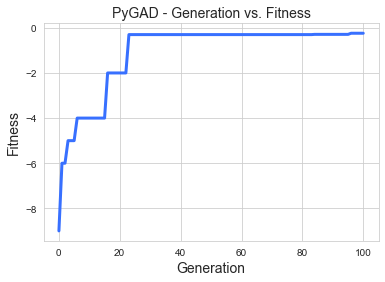

Parameters of the best solution : [2. 2. 1. 2. 1. 0. 2. 0. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1.]
Fitness value of the best solution = -0.25
Number of steps:  25


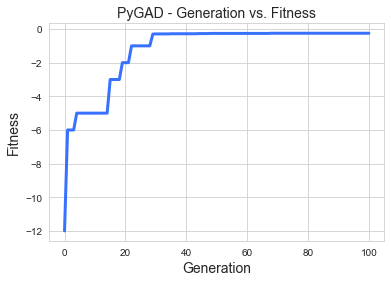

In [5]:
# S to nasze kroki, mamy 30 kroków do wykonania
S = np.zeros(30)


#definiujemy parametry chromosomu
#geny to liczby: 0 - góra, 1 - dół, 2 - prawo, 3 - lewo
gene_space = [0, 1, 2, 3]

def func(solution, solution_idx):
    # macierz kodująca labirynt
    # 0 - puste pola
    # 1 - punkty po których się poruszałam
    # 2 - ściany
    L = np.array([
    [1,0,0,2,0,0,0,2,0,0],
    [2,2,0,0,0,2,0,2,2,0],
    [0,0,0,2,0,2,0,0,0,0],
    [0,2,0,2,2,0,0,2,2,0],
    [0,0,2,2,0,0,0,2,0,0],
    [0,0,0,0,0,2,0,0,0,2],
    [0,2,0,0,2,2,0,2,0,0],
    [0,2,2,2,0,0,0,2,2,0],
    [0,2,0,2,2,0,2,0,2,0],
    [0,2,0,0,0,0,0,0,0,0]
    ])
    where = [0,0] # mówi gdzie jestem teraz
    exit = [9,9]
    penalty = 0 # punkty karne
    steps = 0
    for i in range(len(solution)):
        if solution[i] == 0: #krok w górę
            if where[0] != 0: #sprawdzam czy nie wyjdę poza labirynt
                n_where = [where[0] - 1, where[1]] # patrzę jaki jest następny krok
                if L[n_where[0], n_where[1]] != 2: # sprawdzam czy nie wejdę w ścianę
                    L[n_where[0], n_where[1]] = 1
                    where = n_where #jeśli nie to idę do góry
                    if L[where[0], where[1]] == 1:
                        penalty += 1 # karam za cofanie się
                else:
                    penalty += 1 #karam za wejście w ścianę
            else:
                penalty += 1 # karam za wyjście za labirynt
        if solution[i] == 1: #krok w dół
            if where[0] != 9: #sprawdzam czy nie wyjdę poza labirynt
                n_where = [where[0] + 1, where[1]] # patrzę jaki jest następny krok
                if L[n_where[0], n_where[1]] != 2: # sprawdzam czy nie wejdę w ścianę
                    L[n_where[0], n_where[1]] = 1 # jeśli nie to idę do dołu
                    where = n_where 
                    if L[where[0], where[1]] == 1:
                        penalty += 1 # karam za cofanie się
                else:
                    penalty += 1 #karam za wejście w ścianę
            else:
                penalty += 1 # karam za wyjście za labirynt
        if solution[i] == 2: # krok w prawo
            if where[1] != 9: #sprawdzam czy nie wyjdę poza labirynt
                n_where = [where[0] , where[1] + 1] # patrzę jaki jest następny krok
                if L[n_where[0], n_where[1]] != 2: # sprawdzam czy nie wejdę w ścianę
                    L[n_where[0], n_where[1]] = 1 # jeśli nie to idę w prawo
                    where = n_where 
                    if L[where[0], where[1]] == 1:
                        penalty += 1 # karam za cofanie się
                else:
                    penalty += 1 #karam za wejście w ścianę
            else:
                penalty += 1 #karam za wyjście za labirynt
        if solution[i] == 3: #krok w lewo
            if where[1] != 0: #sprawdzam czy nie wyjdę poza labirynt
                n_where = [where[0] , where[1] - 1] # patrzę jaki jest następny krok
                if L[n_where[0], n_where[1]] != 2: # sprawdzam czy nie wejdę w ścianę
                    L[n_where[0], n_where[1]] = 1 # jeśli nie to idę w prawo
                    where = n_where 
                    if L[where[0], where[1]] == 1:
                        penalty += 1 # karam za cofanie się
                else:
                    penalty += 1 #karam za wejście w ścianę
            else:
                penalty += 1 #karam za wyjście za labirynt
        if where == exit:
            steps = i + 1 # liczba kroków w ile doszedł do wyjścia
            solution = solution[:i]
            break
    # liczy odległość od wyjścia - metryka taksówkowa
    fitness = -(abs(where[0] - exit[0]) + abs(where[1] - exit[1]))  
    return fitness , solution, steps, fitness - penalty, L, fitness - 0.01 * steps



#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    return func(solution, solution_idx)[5]
fitness_function = fitness_func
  

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 200
num_genes = len(S) # 30 kroków

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 100
num_generations = 100
keep_parents = 10

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja 1 gen na 30
# 1/30 = 0.033
mutation_type = "random"
mutation_percent_genes = 4

for i in range(5):
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes)

    #uruchomienie algorytmu
    ga_instance.run()


    #podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution : {}".format(func(solution, solution_idx)[1]))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    print("Number of steps: ", func(solution, solution_idx)[2])

    #wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
    ga_instance.plot_fitness()

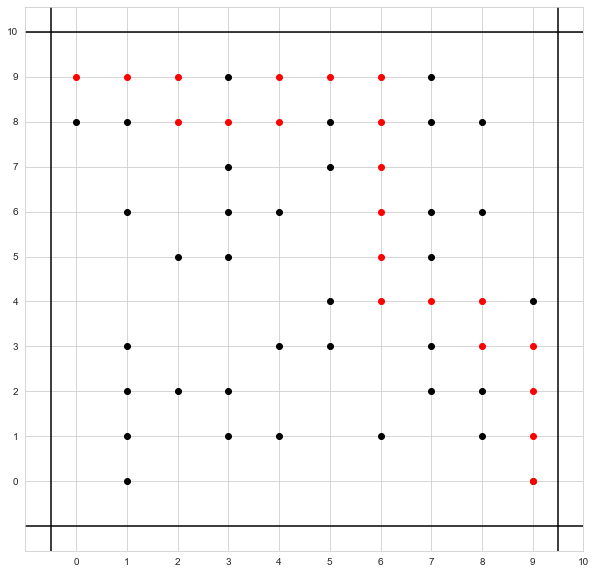

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
plt.xticks(np.arange(11))
plt.yticks(np.arange(11))
plt.xlim(-1,10)
# krawędzie labiryntu
plt.axhline(y = 10, xmin=0, xmax=11, c = 'black')
plt.axhline(y = -1, xmin=0, xmax=11, c = 'black')
plt.axvline(x = -0.5, ymin = 0, ymax = 11, c = 'black')
plt.axvline(x = 9.5, ymin = 0, ymax = 11, c = 'black')

# punkt końcowy
plt.scatter(x = 9 , y = 0, c = 'green')

L = func(solution, solution_idx)[4]

# rysuję drogę i ściany
for i in range(0,10):
    for j in range(0,10):
        if L[i,j] == 1:
            plt.scatter(x = j , y = 9 - i, c = 'red') #przekształcam współrzędne, żeby pierwszy wiersz macierzy był górą labiryntu itp.
        if L[i,j] == 2:
            plt.scatter(x = j , y = 9 - i, c = 'black')

# Poprawiona liczba generacji

Parameters of the best solution : [2. 2. 1. 2. 2. 0. 3. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1.]
Fitness value of the best solution = -0.009999999999999981
Number of steps:  21


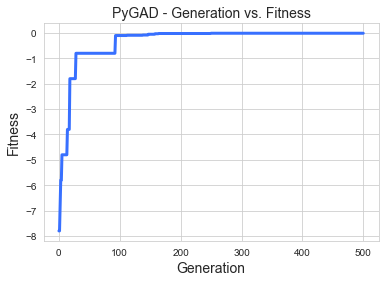

Parameters of the best solution : [2. 1. 3. 2. 2. 1. 2. 2. 2. 2. 0. 0. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1.
 1.]
Fitness value of the best solution = -0.06
Number of steps:  26


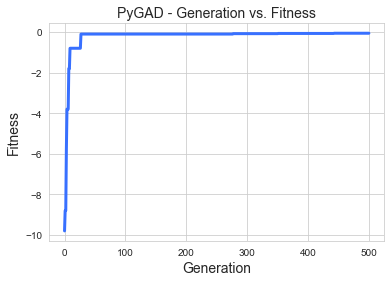

Parameters of the best solution : [1. 2. 2. 1. 2. 2. 0. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1.]
Fitness value of the best solution = -0.03
Number of steps:  23


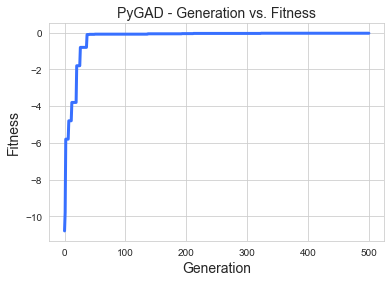

Parameters of the best solution : [1. 3. 2. 2. 1. 2. 2. 0. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1.]
Fitness value of the best solution = -0.01999999999999999
Number of steps:  22


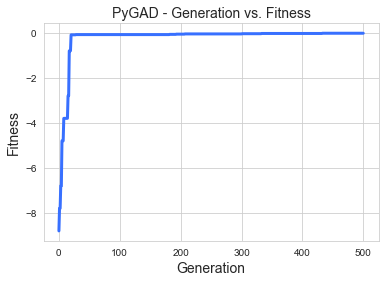

Parameters of the best solution : [2. 2. 0. 0. 1. 2. 2. 0. 2. 0. 2. 1. 3. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1.]
Fitness value of the best solution = -0.04999999999999999
Number of steps:  25


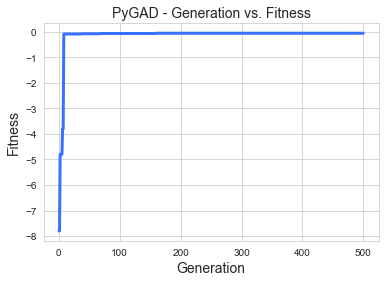

In [10]:
# S to nasze kroki, mamy 30 kroków do wykonania
S = np.zeros(30)


#definiujemy parametry chromosomu
#geny to liczby: 0 - góra, 1 - dół, 2 - prawo, 3 - lewo
gene_space = [0, 1, 2, 3]

def func(solution, solution_idx):
    # macierz kodująca labirynt
    # 0 - puste pola
    # 1 - punkty po których się poruszałam
    # 2 - ściany
    L = np.array([
    [1,0,0,2,0,0,0,2,0,0],
    [2,2,0,0,0,2,0,2,2,0],
    [0,0,0,2,0,2,0,0,0,0],
    [0,2,0,2,2,0,0,2,2,0],
    [0,0,2,2,0,0,0,2,0,0],
    [0,0,0,0,0,2,0,0,0,2],
    [0,2,0,0,2,2,0,2,0,0],
    [0,2,2,2,0,0,0,2,2,0],
    [0,2,0,2,2,0,2,0,2,0],
    [0,2,0,0,0,0,0,0,0,0]
    ])
    where = [0,0] # mówi gdzie jestem teraz
    exit = [9,9]
    penalty = 0 # punkty karne
    steps = 0
    for i in range(len(solution)):
        if solution[i] == 0: #krok w górę
            if where[0] != 0: #sprawdzam czy nie wyjdę poza labirynt
                n_where = [where[0] - 1, where[1]] # patrzę jaki jest następny krok
                if L[n_where[0], n_where[1]] != 2: # sprawdzam czy nie wejdę w ścianę
                    L[n_where[0], n_where[1]] = 1
                    where = n_where #jeśli nie to idę do góry
                    if L[where[0], where[1]] == 1:
                        penalty += 1 # karam za cofanie się
                else:
                    penalty += 1 #karam za wejście w ścianę
            else:
                penalty += 1 # karam za wyjście za labirynt
        if solution[i] == 1: #krok w dół
            if where[0] != 9: #sprawdzam czy nie wyjdę poza labirynt
                n_where = [where[0] + 1, where[1]] # patrzę jaki jest następny krok
                if L[n_where[0], n_where[1]] != 2: # sprawdzam czy nie wejdę w ścianę
                    L[n_where[0], n_where[1]] = 1 # jeśli nie to idę do dołu
                    where = n_where 
                    if L[where[0], where[1]] == 1:
                        penalty += 1 # karam za cofanie się
                else:
                    penalty += 1 #karam za wejście w ścianę
            else:
                penalty += 1 # karam za wyjście za labirynt
        if solution[i] == 2: # krok w prawo
            if where[1] != 9: #sprawdzam czy nie wyjdę poza labirynt
                n_where = [where[0] , where[1] + 1] # patrzę jaki jest następny krok
                if L[n_where[0], n_where[1]] != 2: # sprawdzam czy nie wejdę w ścianę
                    L[n_where[0], n_where[1]] = 1 # jeśli nie to idę w prawo
                    where = n_where 
                    if L[where[0], where[1]] == 1:
                        penalty += 1 # karam za cofanie się
                else:
                    penalty += 1 #karam za wejście w ścianę
            else:
                penalty += 1 #karam za wyjście za labirynt
        if solution[i] == 3: #krok w lewo
            if where[1] != 0: #sprawdzam czy nie wyjdę poza labirynt
                n_where = [where[0] , where[1] - 1] # patrzę jaki jest następny krok
                if L[n_where[0], n_where[1]] != 2: # sprawdzam czy nie wejdę w ścianę
                    L[n_where[0], n_where[1]] = 1 # jeśli nie to idę w prawo
                    where = n_where 
                    if L[where[0], where[1]] == 1:
                        penalty += 1 # karam za cofanie się
                else:
                    penalty += 1 #karam za wejście w ścianę
            else:
                penalty += 1 #karam za wyjście za labirynt
        if where == exit:
            steps = i + 1 # liczba kroków w ile doszedł do wyjścia
            solution = solution[:i]
            break
    # liczy odległość od wyjścia - metryka taksówkowa
    fitness = -(abs(where[0] - exit[0]) + abs(where[1] - exit[1]))  
    return fitness , solution, steps, fitness - penalty, L, fitness - 0.01 * steps + 0.2



#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    return func(solution, solution_idx)[5]
fitness_function = fitness_func
  

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 200
num_genes = len(S) # 30 kroków

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 100
num_generations = 500
keep_parents = 10

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja 1 gen na 30
# 1/30 = 0.033
mutation_type = "random"
mutation_percent_genes = 4

for i in range(5):
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria= ['reach_0'])

    #uruchomienie algorytmu
    ga_instance.run()


    #podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution : {}".format(func(solution, solution_idx)[1]))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    print("Number of steps: ", func(solution, solution_idx)[2])

    #wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
    ga_instance.plot_fitness()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
plt.xticks(np.arange(11))
plt.yticks(np.arange(11))
plt.xlim(-1,10)
# krawędzie labiryntu
plt.axhline(y = 10, xmin=0, xmax=11, c = 'black')
plt.axhline(y = -1, xmin=0, xmax=11, c = 'black')
plt.axvline(x = -0.5, ymin = 0, ymax = 11, c = 'black')
plt.axvline(x = 9.5, ymin = 0, ymax = 11, c = 'black')

# punkt końcowy
plt.scatter(x = 9 , y = 0, c = 'green')

L = func(solution, solution_idx)[4]

# rysuję drogę i ściany
for i in range(0,10):
    for j in range(0,10):
        if L[i,j] == 1:
            plt.scatter(x = j , y = 9 - i, c = 'red') #przekształcam współrzędne, żeby pierwszy wiersz macierzy był górą labiryntu itp.
        if L[i,j] == 2:
            plt.scatter(x = j , y = 9 - i, c = 'black')